# Spike Notebook

a simplified environment for processing Bruker NMR datasets with `SPIKE`.

# 1D NMR Processing and Display

***Usage***

- Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).
- Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.
- The SPIKE code used for processing is visible in the cells, and can be used as a minimal tutorial.
- You can hide it when done to present a clean NoteBook.



***Remark*** *to use this program, you should have installed the following packages:*

- *a complete scientific python environment ( tested with python 3.9 / [anaconda](https://www.anaconda.com/)  with no support for python 2.7 )*
- [`spike`](https://www.bitbucket.org/delsuc/spike) ( *version 0.99.32 minimum* )
- [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/)  ( *tested with version 7.6* )
- [`ipympl`](https://github.com/matplotlib/jupyter-matplotlib)  ( *adds interactivity in the notebook* )

## Initialization
the following cell is to be run once, at the beginning of the processing

## STARTING Environment...


          SPIKE
    Version     : 0.99.32
    Date        : 08-02-2023
    Revision Id : 586

loading plugins... ( use spike.plugins.report() for a short description of each plugins )
*** zoom3D not loaded ***
generic plugins loaded:
Fitter,  Linear_prediction,  Peaks,  bcorr,  fastclean,  gaussenh,  rem_ridge,  sane,  sg,  test,  urQRd, 
user plugins loaded:
msapmin, 
NMR plugins loaded:
Bruker_NMR_FT,  Bucketing,  Integrate,  PALMA,  apmin, 
MS plugins loaded:
FTMS_calib,  PhaseMS,  diagonal_2DMS, 

Interactive module version, 1.3.0


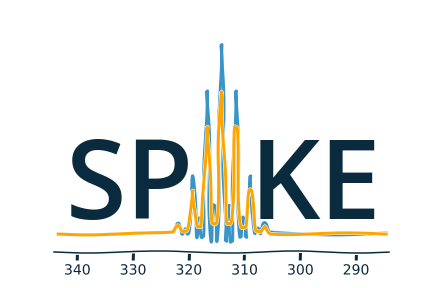

Run date: 2023-03-09T16:20:09.732839


## ...program is Ready

In [1]:
# load all python and interactive tools - has to be run only once (but it does not hurt to rerun...)
from IPython.display import display, HTML, Markdown, Image
display(Markdown('## STARTING Environment...'))
import matplotlib as mpl
%matplotlib widget
import spike
from spike.File.BrukerNMR import Import_1D
from spike.Interactive import INTER as I
from spike.Interactive.ipyfilechooser import FileChooser
I.initialize()
from datetime import datetime
print('Run date:', datetime.now().isoformat() )
display(Markdown('## ...program is Ready'))
from importlib import reload  # this line is debugging help

# configurable items - you may change them to fit you preferences
verbose = 1                              # chose from 0 (terse) to 3 more verbose
mpl.rcParams['figure.figsize'] = (8,4)   # (X,Y) default figure size
I.Activate_Wheel = True                  # True/False    scale with wheel control in the graphic cells 
I.reverse_scroll = False                 # inverse the direction of the mouse wheel, whether it is `True` (TrackPad) or `False` (Mouse)
I.ParamList = ['SOLVENT', 'PULPROG', 'SFO1', 'NS', 'TE', 'TD', 'RG', 'SW', 'O1', 'D1','P1']    # the list of important parameters to display

### Choose the file
The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- use the `Select` button, click on the directory to move around `..` is for going back in the directory tree
- click on the file to select it
- modify the ( *optional* ) `path` argument, to start the exploration on a given location
- changing `path='/DATA/'` to `path='.'` will start the browsing from the current directory 
- After the selection, the selected filename is found in `FC.selected`

In [2]:
# FileChooser
FC = FileChooser(path='/DATA/',filename='fid')
display(FC)

NameError: name 'FileChooser' is not defined

### Import dataset and display FID

This is simply done with the `Import_1D()` tool, which returns a `SPIKE` object.

We store the dataset into a variable, here called d1. 

In [1]:
print('Reading file ',FC.selected)
d1 = Import_1D(FC.selected)                    # Import_1D creates a SPIKE NMRData object, from which everything is available
d1.set_unit('sec')                             # it can be acted upon
d1.pulprog = d1.params['acqu']['$PULPROG']
d1.filename = FC.selected                      # and be extended at will
#print(d1)                                     # print() of the dataset shows a summary of the parameters
display(I.summary(d1, output='HTML'))          # but summary is nicer and more informative
# I.popup_param_table(d1)                      # this command pops up a window with the complete parameter table

I.Show1D(d1, title=FC.selected, yratio=1)      # and display  (yratio=1 to have it centered)
# alternatively you can use the low-level tool below:
# d1.display()  # with many options, plus access to matplotlib details

NameError: name 'FC' is not defined

In [4]:
# If you uncomment the following line (remove the #) this command pops-up a table with the list of all acquisition parameters
#I.popup_param_table(d1)

Spectra can be interactively explored with the jupyter tools displayed  on the side of the dataset:

- zoom with <button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Zoom to rectangle" style="outline: currentcolor none medium;"><i class="center fa fa-square-o"></i></button>
- shift and resize
<button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Pan axes with left mouse, zoom with right" style="outline: currentcolor none medium;"><i class="center fa fa-arrows"></i></button>
 (with left and right click)
- <button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Back to previous view" style="outline: currentcolor none medium;"><i class="center fa fa-arrow-left"></i></button>
and
<button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Forward to next view" style="outline: currentcolor none medium;"><i class="center fa fa-arrow-right"></i></button>
allow to navigate in the zoom history

- <button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Download plot" style="outline: currentcolor none medium;"><i class="center fa fa-fw fa-floppy-o"></i></button> is used to store a `png` graphic file of the current display.

The drawing zone can be resized using the little grey triangle on the lower-right corner

In addition, the `I.Show1D()` is a higher level tool which adds a control of the scale with the mouse wheel, a scale slider, a
<button class="p-Widget jupyter-widgets jupyter-button widget-button" style="width: 80px;" >Save figure</button>
 button, to store a high quality pdf version,
 and a
<button class="p-Widget jupyter-widgets jupyter-button widget-button mod-success" style="width: 80px;" >Done</button>
button to freeze the picture.

## Basic Processing
The following cell applies a basic processing, check the documentation for more advanced processing

Show1D(children=(VBox(children=(Button(button_style='success', description='Reset', layout=Layout(width='80px'…

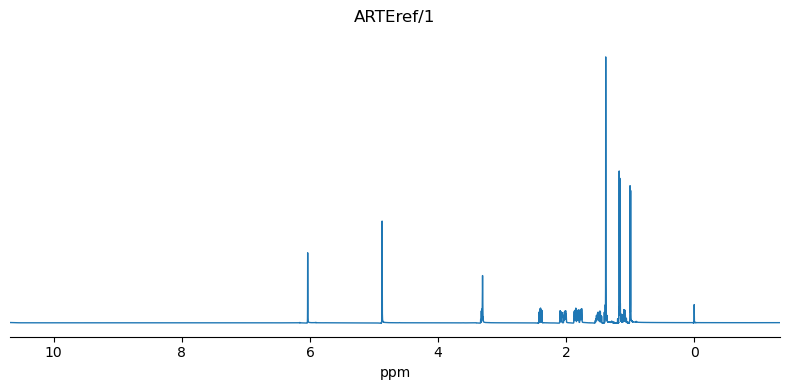

In [5]:
# Basic Processing
LB = 0.3                        # you can adapt LB to your means, in Hz
D1 = d1.copy()                  # copy the imported data-set to another object for processing
D1.center().apod_em(LB).zf(4).ft_sim()  # chaining   centering - apodisation - zerofill - FT
#D1.bk_corr().apmin()            #  Bruker DSP correction - autophase
D1.bk_pk()                    #  alternatively from previous line:  use stored Bruker correction
D1.set_unit('ppm')              # set to ppm unit ('Hz' and 'point' also available)
                                # all Spike command can be pipelined at will - these lines could be piped as one.
I.Show1D(D1, title=FC.nmrname)  #  and display

<hr/>

## Following steps are for special operations

### rephasing
If the spectrum requires rephasing, use the interactive phaser down here.

Use `scale` (or mouse wheel) and the zoom box to tune the display; then use `P0, P1, pivot` to optimize the phase.

`pivot` is where the $1^{st}$ order correction is not acting - and can be moved by typing the value or by right-clicking on the spectrum

Once finished, click on `Done`

Phaser1D(children=(VBox(children=(HBox(children=(Button(button_style='warning', description='Exit', style=Butt…

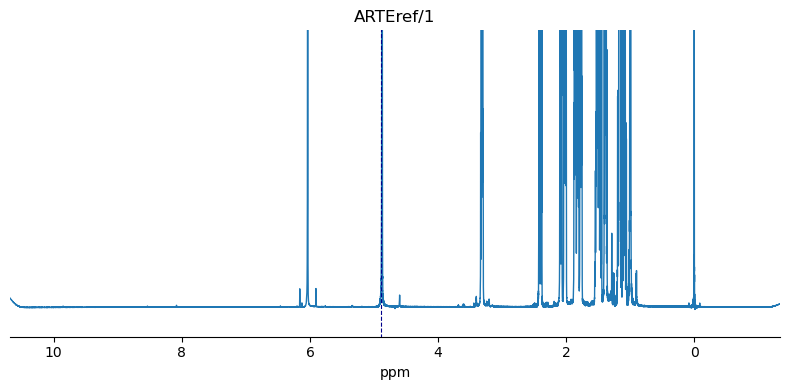

Applied: data.phase(6.2,  -5.0)


In [6]:
# rephasing
I.Phaser1D(D1, title=FC.nmrname)

### Baseline correction
A simple interactive baseline correction tool.

The principle is to place pivot points on the desired baseline, and let the program interpolate.

Choose positions on the baseline of the spectrum with the `select` entry or  by right-clicking on the baseline.
`Add` a control point and see its effect either on the spectrum, or the computed baseline.

You can also `Rem`ove the control point closest to the selector.
You can also try the `Auto` button for a set of selector points, a set you can optimize by adding and removing points.

baseline1D(children=(VBox(children=(HBox(children=(Label(value='Baseline points'), IntText(value=8, layout=Lay…

Applied correction:
data.bcorr(method='spline', nsmooth=1, xpunit='current',\
           xpoints=[-0.5482, 0.435, 2.227, 2.84, 4.135, 5.509, 7.656, 8.3029, 9.1955, 10.365]))



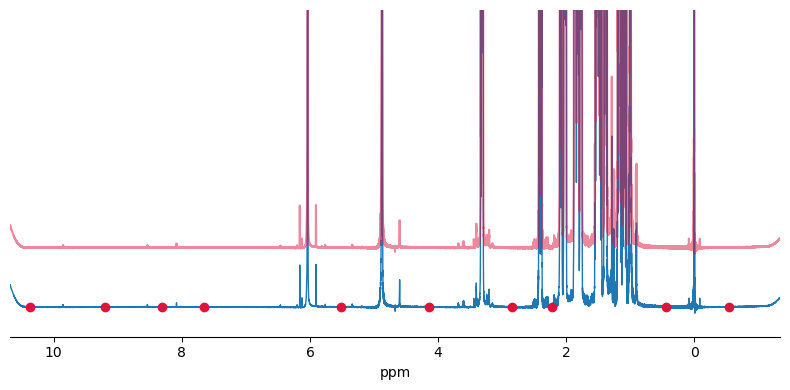

In [7]:
# Baseline Correction
b = I.baseline1D(D1)
b

## Peak-Picker
- first detect peaks (<span style=color:red>in red</span>) in the zoom window by moving the `threshold`
- `Add` the detected peaks to the permanent peak list (<span style=color:blue>in blue</span>)
- recalibrate the spectrum in the `calibration` tab by clicking on a peak and setting the correct ppm value
- get the peak-list in the `Peak Table` tab

NMRPeaker1D(children=(VBox(children=(HBox(children=(Button(button_style='warning', description='Exit', layout=…

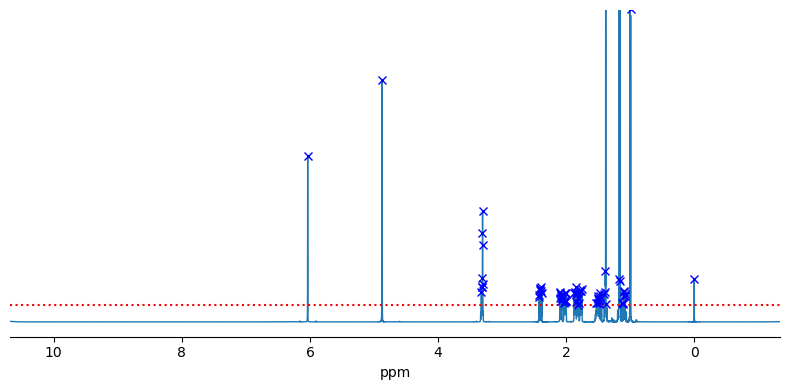

Output(layout=Layout(border='1px solid red'), outputs=({'output_type': 'display_data', 'data': {'text/plain': …

In [10]:
# Peak Picker
I.NMRPeaker1D(D1)

## Integrate
Integration zones are computed from the peaks detected with the Peak-Picker above **required**


NMRIntegrate(children=(VBox(children=(Button(button_style='warning', description='Exit', layout=Layout(width='…

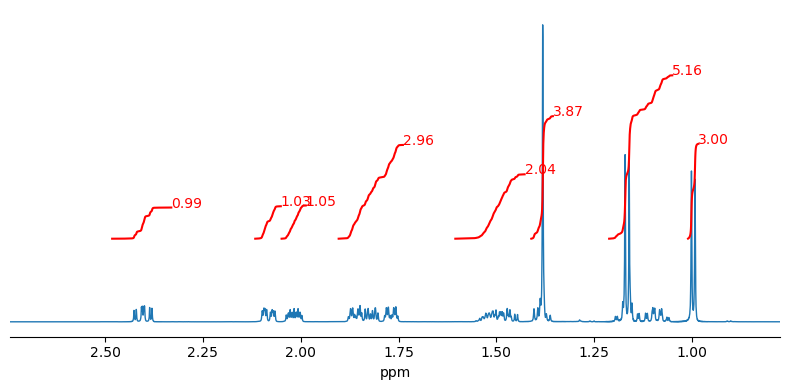

Output(layout=Layout(border='1px solid red'), outputs=({'output_type': 'display_data', 'data': {'text/plain': …

In [18]:
# Integration
D1.real()
I.NMRIntegrate(D1)

## Interactive composite display
Convenient to set-up your own figure

Chose

- to display integrals and/or peakpicking
- the color the linewidth and placement of every elements
- superimpose different data-set
    - additional data-sets should have been stored before hand in SPIKE format ( `*.gs1` )
    - excerpt from current data-set can be added using " Self " as data name


Show1Dplus(children=(Tab(children=(VBox(children=(VBox(children=(VBox(children=(HBox(children=(Text(value='ART…

/home/mad/miniconda3/envs/OW/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


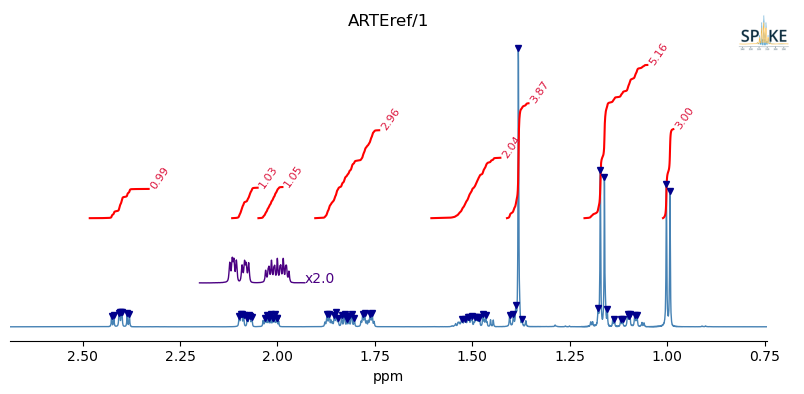

In [21]:
# Composite display
reload(I)
Sp = I.Show1Dplus(D1, title=FC.nmrname, N=5)   # N is the number of slots in the Superimpose tool
Sp

---
# optional steps



---

## Compute Signal / Noise (SNR)

*Remark - if you want to compare with SINO results from Topspin - divide these values by 2*

Several possibilities:

In [ ]:
# Calculate Signal to Noise Ratio using the Largest peak and Standard Deviation on a defined GIVEN spectral region
zmleft = 10
zmright = 12
noise = D1.copy().extract(zmleft,zmright).display().get_buffer().std()
print(f'Noise: {noise:g},  SNR: {D1.absmax/noise:<6.0f}')

In [ ]:
#Calculate Signal to Noise Ratio using using the Largest peak and Standard Deviation on the WHOLE noise floor excluding signals 
_,noise = D1.robust_stats()
print(f'Noise: {noise:g},  SNR: {D1.absmax/noise:<6.0f}')

In [ ]:
#Calculate Signal to Noise Ratio using using the Largest peak in the defined spectral reagion and Standard Deviation on the WHOLE noise floor excluding signals 
zmleft = 0.5
zmright = -0.5
signal = max(abs(D1.copy().extract(zmleft,zmright).display().get_buffer()))
_,noise = D1.robust_stats()
print(f'Noise: {noise:g},  signal: {signal:g}   SNR: {signal/noise:<6.0f}')

---

## Save the data-set and reload
either as stand alone native SPIKE files, (there are other formats)

In [ ]:
Sp.drspectrum[0].set_linewidth

In [ ]:
D1.save('example1.gs1')

or as a `csv` text file, - in which case, it is probably better to remove the imaginary part, not useful there.

The file contains some basic informations in addition to the spectral data

In [ ]:
D1.copy().real().save_csv('example.csv')

### Load a saved dataset
and use it as if it was just processed, (it scratches the previous one)

you can
- baseline correct
- pick-peak
- integrate
- display


In [ ]:
# Choose
FC2 = FileChooser(path='/DATA/',filename='*.gs1')
display(FC2)

In [ ]:
# and valid
from spike.NMR import NMRData
print('Reading file ',FC2.selected)
D1 = NMRData(name=FC2.selected)                 # read file, creates a SPIKE NMRData object, from which everything is available
D1.set_unit('ppm')                             # it can be acted upon
D1.filename = FC2.selected                      # and be extended at will
print(D1)                                      # print() of the dataset shows a summary of the parameters
try:
    display(HTML('<b>title: </b>'+ D1.params['acqu']['title']))    # d1.params is a dictionary which contains the whole 'acqu' and 'proc' Bruker parameters
except:
    pass
I.Show1D(D1, title=FC2.selected)

---
## Export integrals and peak lists

### Export the peak list to a csv file

In [ ]:
D1.pk2pandas().to_csv('peaklist.csv')

### Export the integrals to a csv file

In [ ]:
D1.integrals.to_pandas().to_csv('integrals.csv')

---

This part adds the bucket list tool 

## Export a buckelist

In [ ]:
# adapt the parameters below
Zoom = (0.5,8)                    # zone to bucket       - (start, end) in ppm
BucketSize = 0.04                 # width of the buckets - in ppm
Output = 'screen'                 # 'screen'  or  'file'  determines output
BucketFileName = 'bucket.csv'     #  the filename if Output (above) is 'file'  - don't forget the .csv extension.

In [ ]:
# the following cell executes the bucketing
if Output == 'file':
    with open(BucketFileName,'w') as F:
        D1.bucket1d(zoom=Zoom, bsize=BucketSize, pp=True, file=F)
    print('buckets written to %s\n'%op.realpath(BucketFileName))
else:
    D1.bucket1d(zoom=Zoom, bsize=BucketSize, pp=True);

*Tools in this page is under intensive development - things are going to change rapidly.*

to come/finish:

- spectral superposition
- annotations